# Examen Parcial n°1 2da Parte - TLP3 - Python para Ciencia de Datos.


**A partir del datasets brindado, realizar los siguientes procedimientos:**

* Importar datasets con Pandas.
* Explorar los datos con los metodos correspondientes. 
* Limpieza de los datos (Normalización de datos).
* Obtener estadisticas.
* Mostrar los datos procesados con graficos utilizando la libreria Matplotlib.
* Exportar el contenido a un archivo sqlite utilizando PANDAS.


**Importante: Se debe documentar cada procedimiento realizado, siguiendo la siguiente estructura:**

1. Celda de Markdown (Documentación)
2. Código (Sin comentarios, se debe documentar lo sufiente solo en la celda de markdown).


### Criterios de Evaluación:

1. No esta permitido el uso de IAs durante el examen. (Desactivar Copilot o cualquier herramienta de IA para autocompletar codigo.)

2. Se deben utilizar nombres de variables descriptivos y claros (Utilizar la nomeclatura correspondiente para los nombres de variables).

3. Comentarios claros y concisos que expliquen el propósito de cada sección del código en una celda de markdown antes del código.

4. Utilizar mensajes de commit descriptivos. (Puedes utilizar la extension CONVENTIONAL COMMIT de VS-CODE).

5. Entrega en tiempo y forma (Parciales entregados fuera de hora o con commits pasados el horario de entrega quedará invalidado.)

6. Todo el código desarrollado debe ser subido a un repositorio en GitHub (el nombre del repositorio de seguir la siguiente estructura: 
**parcial1_tlp3_nombre_apellido**).

7. Para resolver las actividades se debe insertar casillas de codigo entre cada actividad del cuaderno de Jupyter.

8. Deben trabajar con el datasets adjunto.

9. Una vez finalizado el examen, los resultados deben quedar guardados debajo de cada celda (NO EJECUTAR LA OPCIÓN "borrar todas las salidas").

**Importante:** Una vez finalizado el examen, marcar como completado en el classroom.

## Actividades: 
### 1. Importación del Dataset con Pandas

En esta sección, se debe utilizar la librería Pandas para cargar el archivo CSV que contiene los datos de VENTAS en un DataFrame.

### 2. Exploración Inicial de los Datos

A continuación, se deben emplear métodos de Pandas para obtener una visión general del dataset. 
- 2.1: Visualizar las primeras filas y ultimas.
- 2.2: Obtener informacion del df con su metodo correspondiente.
- 2.3: Hacer un conteo de valores nulos.

### 3. Limpieza y Normalización de los Datos

- 3.1. Esta etapa crucial deben aplicar la corrección de diversos errores presentes en el dataset. Se abordarán los valores faltantes (Deben aplicar los metodos que ustedes crean convenientes **(Solo 1)**, por ejemplo: Eliminación de filas, cubrir valores con media, mediana, etc.)
- 3.2: La columna Fecha deberan pasarla al tipo datetime con su metodo correspondiente.
- 3.3: Corregir las mayusculas en el caso de Nombre y Apellido (Si es que corresponde.)


### 4. Obtención de Estadísticas Descriptivas

Después de la limpieza, deben hacer lo siguiente: 

- 4.1: calcular nuevamente las estadísticas descriptivas para observar el impacto del proceso de limpieza en los datos numéricos.
- 4.2: Calcular estadísticas específicas por grupo (Agrupar dos columnas).

### 5. Visualización de los Datos con Matplotlib

En esta sección, deben utilizar la librería Matplotlib para crear **UNA** visualización que permitan comprender mejor los datos de ventas.El grafico es a elección, puede crear **UNO** de los siguientes: histogramas, diagramas de dispersión, gráficos de barras y graficos de torta.

### 6. Exportación a Archivo SQLite

Finalmente, deben utilizar la funcionalidad de Pandas para guardar el DataFrame procesado en una base de datos SQLite. Deben hacer una conexión y hacer una consulta para ver si los datos fueron cargados correctamente.



### 1. Importación del Dataset con Pandas

En esta sección, se debe utilizar la librería Pandas para cargar el archivo CSV que contiene los datos de VENTAS en un DataFrame.

In [45]:
import pandas as pd 
df = pd.read_csv("ventas.csv") #se carga el archivo csv con pandas como dataframe

### 2. Exploración Inicial de los Datos

A continuación, se deben emplear métodos de Pandas para obtener una visión general del dataset. 
- 2.1: Visualizar las primeras filas y ultimas.
- 2.2: Obtener informacion del df con su metodo correspondiente.
- 2.3: Hacer un conteo de valores nulos.

In [56]:
#2.1
df.head() #se muestra las primeras filas para ver como estan los datos

df.tail() #se muestra las ultimas filas

#2.2
df.info() #se ve un resumen del df

#2.3
df.isnull().sum() #conteo de valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID_Venta          105 non-null    int64  
 1   Nombre_Cliente    105 non-null    object 
 2   Apellido_Cliente  105 non-null    object 
 3   Fecha             105 non-null    object 
 4   Producto          101 non-null    object 
 5   Cantidad          105 non-null    int64  
 6   Precio_Unitario   92 non-null     float64
 7   Total_Venta       92 non-null     float64
 8   Metodo_Pago       94 non-null     object 
 9   Region            100 non-null    object 
dtypes: float64(2), int64(2), object(6)
memory usage: 8.3+ KB


ID_Venta             0
Nombre_Cliente       0
Apellido_Cliente     0
Fecha                0
Producto             4
Cantidad             0
Precio_Unitario     13
Total_Venta         13
Metodo_Pago         11
Region               5
dtype: int64

### 3. Limpieza y Normalización de los Datos

- 3.1. Esta etapa crucial deben aplicar la corrección de diversos errores presentes en el dataset. Se abordarán los valores faltantes (Deben aplicar los metodos que ustedes crean convenientes **(Solo 1)**, por ejemplo: Eliminación de filas, cubrir valores con media, mediana, etc.)
- 3.2: La columna Fecha deberan pasarla al tipo datetime con su metodo correspondiente.
- 3.3: Corregir las mayusculas en el caso de Nombre y Apellido (Si es que corresponde.)

In [60]:
#3.1
df = df.dropna(subset=["Producto"]) #elimino los productos que no tienen nombre
df.info()
df["Precio_Unitario"].fillna(df["Precio_Unitario"], inplace=True) #se cambian los datos nulos en precio_unitario con la media
df["Total_Venta"] = df["Cantidad"] * df["Precio_Unitario"] #el total depende del precio unitario, entonces rellenamos lo que falta con una multiplicacion
#3.2
def convertir_d_m_y(fecha_str):
    fecha_str=str(fecha_str).strip()
    try:
        if fecha_str[:4].isdigit():
            fecha = pd.to_datetime(fecha_str, dayfirst=False, errors="raise")
            return fecha.strftime("%d-%m-%Y")
        else:
            fecha = pd.to_datetime(fecha_str, dayfirst=True, errors="raise")
            return fecha.strftime("%d-%m-%Y")
    except:
        return "Fecha invalida"
df["Fecha"]= df["Fecha"].apply(convertir_d_m_y) #se realiza una funcion que separa la fecha y le cambia el formato asi quedan iguales todos
#3.3
df["Nombre_Cliente"] = df["Nombre_Cliente"].str.capitalize()
df["Apellido_Cliente"] = df["Apellido_Cliente"].str.capitalize()#en los dos se pone mayuscula al principio porque habia algunos que no tenian capitalizado los nombres
df.head() #para mostrar que se ve bien

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, 0 to 104
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID_Venta          101 non-null    int64  
 1   Nombre_Cliente    101 non-null    object 
 2   Apellido_Cliente  101 non-null    object 
 3   Fecha             101 non-null    object 
 4   Producto          101 non-null    object 
 5   Cantidad          101 non-null    int64  
 6   Precio_Unitario   89 non-null     float64
 7   Total_Venta       89 non-null     float64
 8   Metodo_Pago       90 non-null     object 
 9   Region            96 non-null     object 
dtypes: float64(2), int64(2), object(6)
memory usage: 8.7+ KB


,ID_Venta,Nombre_Cliente,Apellido_Cliente,Fecha,Producto,Cantidad,Precio_Unitario,Total_Venta,Metodo_Pago,Region
0,1,Ana,García,01-05-2024,Laptop,1,1200.50,1200.50,Tarjeta de Crédito,Norte
1,2,Carlos,López,08-01-2024,Mouse Inalámbrico,2,25.75,51.50,Efectivo,Sur
2,3,Sofía,Martínez,12-01-2024,Teclado Mecánico,1,75.99,75.99,Transferencia Bancaria,Este
3,4,Pedro,Rodríguez,15-01-2024,Monitor 24 pulgadas,1,NaN,NaN,Tarjeta de Débito,Oeste
4,5,Laura,Sánchez,18-01-2024,Auriculares Bluetooth,1,99.95,99.95,Tarjeta de Crédito,Norte


### 4. Obtención de Estadísticas Descriptivas

Después de la limpieza, deben hacer lo siguiente: 

- 4.1: calcular nuevamente las estadísticas descriptivas para observar el impacto del proceso de limpieza en los datos numéricos.
- 4.2: Calcular estadísticas específicas por grupo (Agrupar dos columnas).

In [81]:
#4.1
print(df.describe()) #se hace estadistica para ver como queda el df despues de limpiar
#4.2
ventas_por_region = df.groupby(["Region","Metodo_Pago"])["Cantidad"].sum().reset_index() #se agrupa por metodo de pago y region para ver donde se vende mas y con que se compra mas
ventas_por_region.head(10)

         ID_Venta    Cantidad  Precio_Unitario  Total_Venta
count  101.000000  101.000000        89.000000    89.000000
mean    51.653465    1.198020       233.000899   236.090112
std     30.181264    0.548084       382.010034   380.404887
min      1.000000    1.000000         2.000000     2.000000
25%     26.000000    1.000000        49.990000    55.000000
50%     51.000000    1.000000        92.990000    95.500000
75%     77.000000    1.000000       180.500000   180.500000
max    105.000000    4.000000      1800.990000  1800.990000


,Region,Metodo_Pago,Cantidad
0,Este,Transferencia Bancaria,14
1,Norte,Tarjeta de Crédito,22
2,Oeste,Tarjeta de Débito,40
3,Sur,Efectivo,28


### 5. Visualización de los Datos con Matplotlib

En esta sección, deben utilizar la librería Matplotlib para crear **UNA** visualización que permitan comprender mejor los datos de ventas.El grafico es a elección, puede crear **UNO** de los siguientes: histogramas, diagramas de dispersión, gráficos de barras y graficos de torta.


<function matplotlib.pyplot.show(close=None, block=None)>

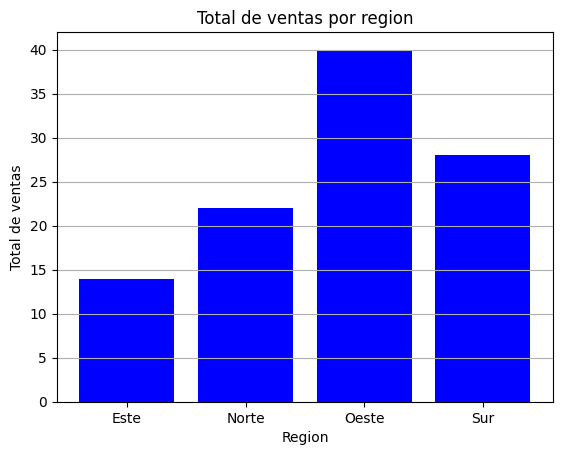

In [83]:
import matplotlib.pyplot as plt 
plt.bar(ventas_por_region["Region"], ventas_por_region["Cantidad"], color="blue")
plt.title("Total de ventas por region")
plt.ylabel("Total de ventas")
plt.xlabel("Region")
plt.grid(axis="y")
plt.show